# Part II - ProsperLoan Explanatory Analysis
## by Peter Nguyen

## Investigation Overview

> The goal of this presentation is to share key insights that were found analyzing ProsperLoan's massive dataset. I specifically targeted 4 variables: Term of the Loan, Occupation, Interest Rates, and the Amount of Loan that was given.

## Dataset Overview and Executive Summary

> This dataset was provided by Udacity and is a dataset of Prosper's Loans. During the data exploration analyst phase, I discovered that Term of the Loan & Occupation have significant impants on Interest Rates or the Amount of Loan that was given.

> **Key Insights**: 
> * ProsperLoan's customer are predominantly Computer Programmers & Executives.
> * Even though Computer Programmers & Executives are the most common borrower, Judges are often granted higher loans compared to both Computer Programmers & Executives.
> * Student's who have a loan term of 60 months have higher interest rates compared to students who have 12 month and 36 month terms.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df_sub = df[['Occupation', 'Term', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount']]

## Count of Borrowers based on Occupation

This bar chart illustrates the number of individuals employed in specific professions that receive loans from Prosper. As shown in the chart below, the majority of borrowers from Prosper are either Computer Programmers or Executives in their respective companies. There is approximately a drop of around 500 in the count when moving from the second most common career, Executives, to the third most common career, Teachers.

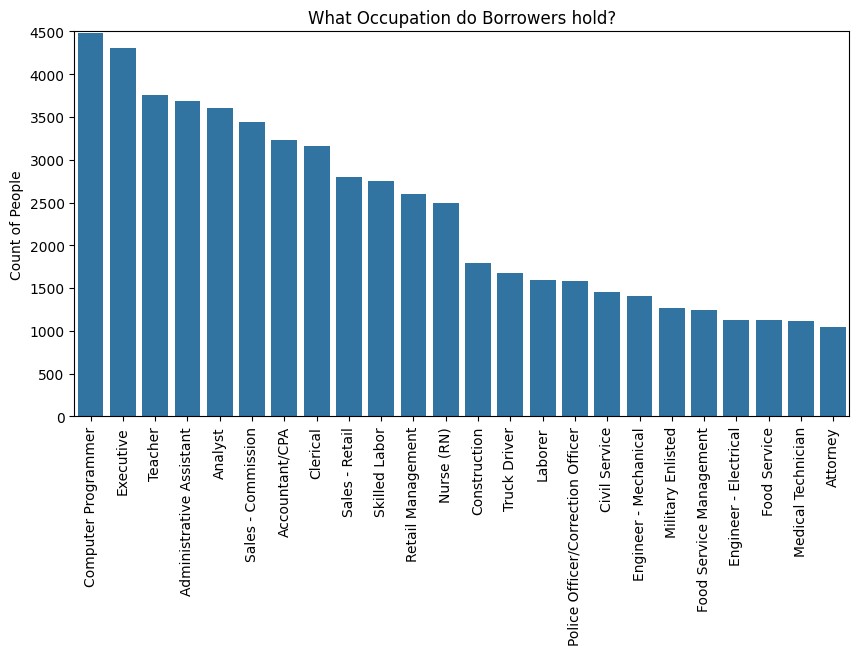

In [22]:
df_jobs = df_sub[~df_sub['Occupation'].isin(['Professional', 'Other'])]
jobs = []

occupation_counts = df_jobs['Occupation'].value_counts()

for occupation, count in occupation_counts.items():
    if count > 1000:
        jobs.append(occupation)
        
plt.figure(figsize = [10,5])
sns.countplot(data=df_jobs, x= 'Occupation', order = jobs);
plt.xticks(rotation=90);
plt.ylabel('Count of People');
plt.xlabel('');
plt.title('What Occupation do Borrowers hold?');
plt.ylim(0, 4500);

## Comparing Judge's loan reward to Computer Programmers & Executives


Even though, Computer Programmers & Executive are the top type of borrowers, as shown above, Judges are granted larger loans by a wide margin compared to both Executives and Computer Programmer.

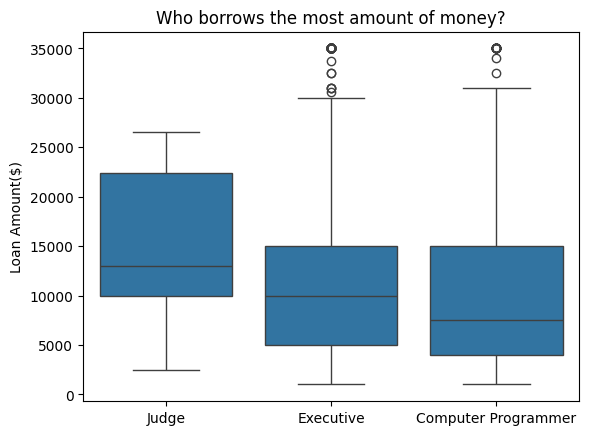

In [17]:
order=['Judge', 'Executive', 'Computer Programmer']
sns.boxplot(data=df_sub, x= 'Occupation', y='LoanOriginalAmount', order= order);
plt.ylabel('Loan Amount($)');
plt.xlabel('');
plt.title('Who borrows the most amount of money?');

## Student Loan Term vs Interest Rates

As you can see in this Faceted Boxplot, students who have 5 year(60M) loans have higher interest rates across the board. While students with a 1 year loan duration have on average a lower interest rate compared to the rest of the loan durations.

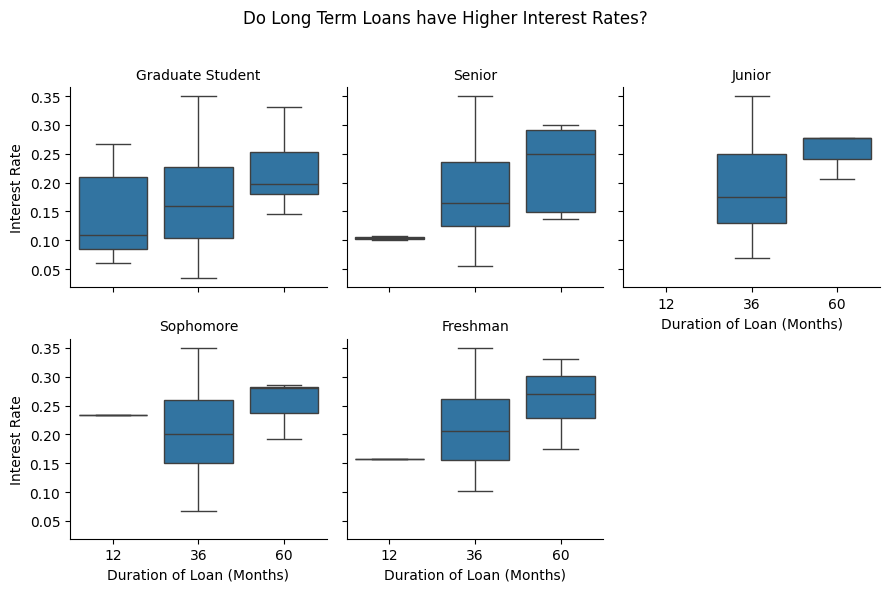

In [9]:
df_student=df_sub[df_sub['Occupation'].str.contains('Student', regex=False).astype(bool)]
df_student['Occupation'] = df_student['Occupation'].str.replace('Student - College ', '', regex=False)

g = sns.FacetGrid(data= df_student, col ='Occupation', margin_titles= True, col_wrap = 3, 
                  col_order = df_student['Occupation'].value_counts().index[:-2])
g.map(sns.boxplot, 'Term', 'BorrowerRate', order= [12, 36, 60]);
g.set_titles('{col_name}');
g.fig.suptitle('Do Long Term Loans have Higher Interest Rates?');
g.fig.subplots_adjust(top=.85);
g.set_ylabels('Interest Rate');
g.set_xlabels('Duration of Loan (Months)');